<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/Week%204/Assignment/Imdb_Dataset_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.layers import LSTM,BatchNormalization, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [13]:
# Parameter
num_words = 30000
maxlen = 500

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [14]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Konversi ke dictionary
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.0), 1: np.float64(1.0)}


## RNN Model

RNN (Recurrent Neural Network) bekerja dengan menyimpan informasi dari time step sebelumnya:

### Rumus RNN:

**Hidden state:**
$$
h_t = \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b_h)
$$

**Output:**
$$
y_t = W_{hy}h_t + b_y
$$

- \( x_t \): input pada waktu ke-t
- \( h_t \): hidden state pada waktu ke-t
- \( W_{xh}, W_{hh}, W_{hy} \): bobot jaringan
- \( b_h, b_y \): bias
- \( \tanh \): fungsi aktivasi nonlinear

In [15]:
# Model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128),

    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(64, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(64, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(32),
    Dropout(0.3),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [16]:
# Train
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weights
)

# Evaluasi akhir akurasi test
score_rnn = model.evaluate(x_test, y_test, verbose=0)
print("Akurasi Test SimpleRNN: {:.2f}%".format(score_rnn[1] * 100))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 213ms/step - accuracy: 0.5013 - loss: 0.7084 - val_accuracy: 0.5062 - val_loss: 0.6932
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 180ms/step - accuracy: 0.4963 - loss: 0.6958 - val_accuracy: 0.4950 - val_loss: 0.6937
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 185ms/step - accuracy: 0.4933 - loss: 0.6950 - val_accuracy: 0.5050 - val_loss: 0.6932
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 180ms/step - accuracy: 0.5000 - loss: 0.6937 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.5072 - loss: 0.6931 - val_accuracy: 0.5048 - val_loss: 0.6933
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 185ms/step - accuracy: 0.5112 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 185ms/step - accuracy: 0.5011 - loss: 0.6933 - val_accuracy: 0.4938 - val_loss: 0.6934
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 185ms/step - accuracy: 0.4934 - loss: 0

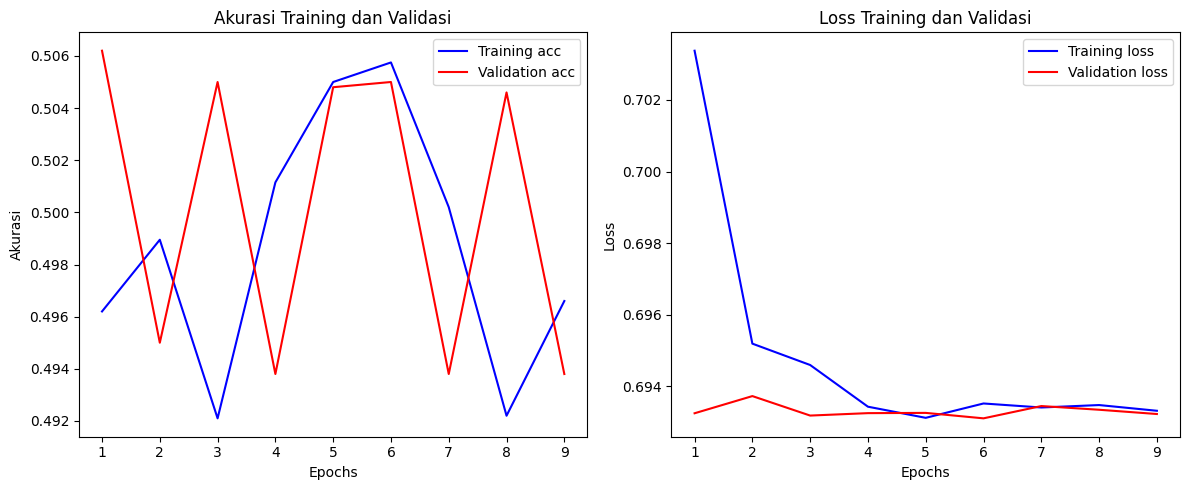

In [17]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Akurasi Training dan Validasi')
    plt.xlabel('Epochs')
    plt.ylabel('Akurasi')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Loss Training dan Validasi')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history)

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step
              precision    recall  f1-score   support

           0     0.5005    0.9806    0.6627     12500
           1     0.5236    0.0213    0.0409     12500

    accuracy                         0.5010     25000
   macro avg     0.5121    0.5010    0.3518     25000
weighted avg     0.5121    0.5010    0.3518     25000

AUC Score: 0.4927


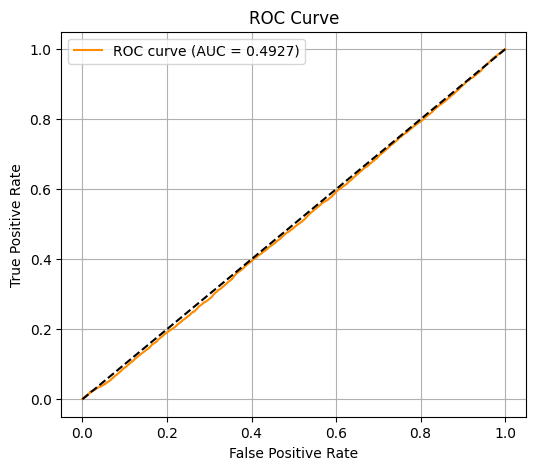

In [18]:
# Prediksi
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

# Classification report
print(classification_report(y_test, y_pred, digits=4))

# AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score: {:.4f}".format(auc_score))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## LSTM Model

LSTM (Long Short-Term Memory)

LSTM menggunakan 3 gerbang: input, forget, dan output gate untuk mengatasi masalah long-term dependency.

### Rumus LSTM:

**Forget gate:**
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

**Input gate:**
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) \\
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

**Cell state:**
$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$

**Output gate:**
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) \\
h_t = o_t \cdot \tanh(C_t)
$$

In [24]:
model_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=128),

    LSTM(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    LSTM(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    LSTM(64),
    Dropout(0.3),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])


In [25]:
# Compile model LSTM
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model LSTM
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - accuracy: 0.4944 - loss: 0.7380 - val_accuracy: 0.5062 - val_loss: 0.6928
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.6902 - loss: 0.5563 - val_accuracy: 0.7718 - val_loss: 0.5003
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9136 - loss: 0.2304 - val_accuracy: 0.7420 - val_loss: 0.5383
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9467 - loss: 0.1522 - val_accuracy: 0.8394 - val_loss: 0.5239
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.9707 - loss: 0.0864 - val_accuracy: 0.8490 - val_loss: 0.5331


In [27]:
score_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
print("Akurasi Test LSTM: {:.2f}%".format(score_lstm[1] * 100))

Akurasi Test LSTM: 73.13%


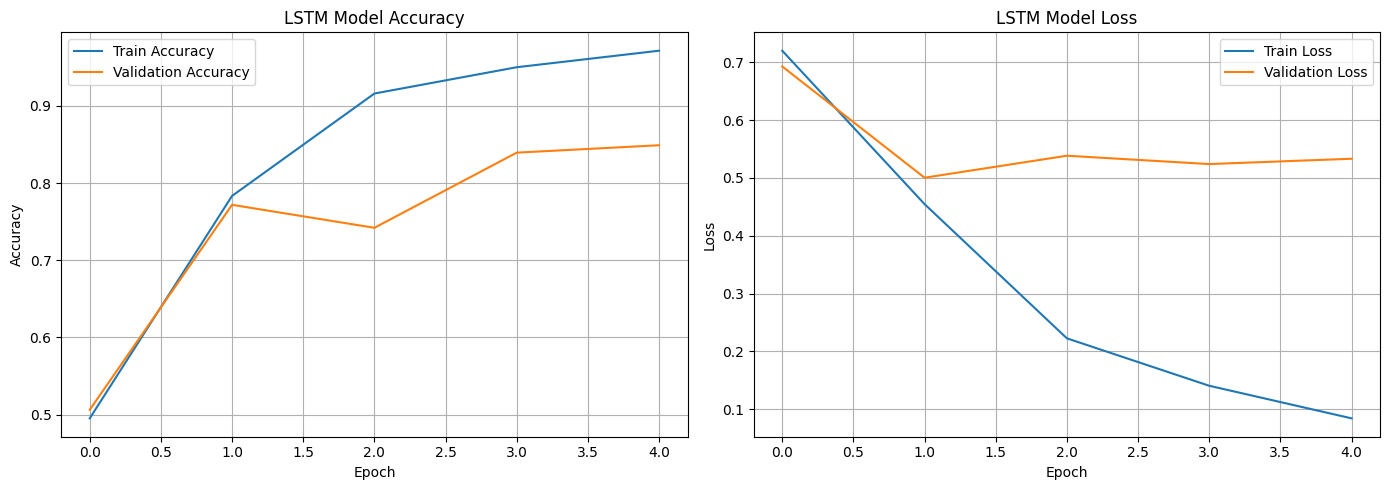

In [28]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
              precision    recall  f1-score   support

           0     0.6548    0.9783    0.7845     12500
           1     0.9571    0.4842    0.6431     12500

    accuracy                         0.7313     25000
   macro avg     0.8060    0.7313    0.7138     25000
weighted avg     0.8060    0.7313    0.7138     25000



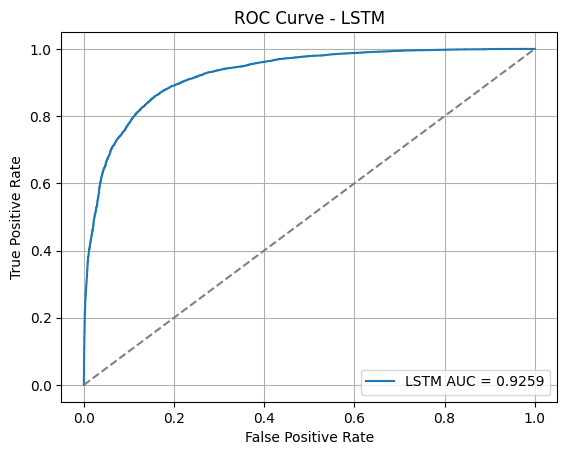

In [29]:
# Prediksi
y_pred_prob_lstm = model_lstm.predict(x_test)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype("int32")

# Classification report
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred_lstm, digits=4))

# ROC & AUC
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_prob_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_prob_lstm)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM AUC = {auc_lstm:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LSTM")
plt.legend()
plt.grid(True)
plt.show()


## GRU Model

GRU (Gated Recurrent Unit)

GRU adalah penyederhanaan dari LSTM dengan 2 gate: reset dan update.

### Rumus GRU:

**Update gate:**
$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t])
$$

**Reset gate:**
$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t])
$$

**Candidate activation:**
$$
\tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t])
$$

**Final hidden state:**
$$
h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t
$$

In [35]:
# GRU Model
model_gru = Sequential([
    Embedding(input_dim=num_words, output_dim=128),

    GRU(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    GRU(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    GRU(64),
    Dropout(0.3),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

In [36]:
# Compile
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_gru = model_gru.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weights
)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.5078 - loss: 0.7289 - val_accuracy: 0.5062 - val_loss: 0.6930
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.5048 - loss: 0.6970 - val_accuracy: 0.4964 - val_loss: 0.6820
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.7950 - loss: 0.4509 - val_accuracy: 0.8530 - val_loss: 0.3763
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9462 - loss: 0.1577 - val_accuracy: 0.8958 - val_loss: 0.2941
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9769 - loss: 0.0738 - val_accuracy: 0.8778 - val_loss: 0.3419
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9891 - loss: 0.0386 - val_accuracy: 0.8664 - val_loss: 0.4799
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.8522 - val_loss: 0.8665


In [37]:
# Evaluasi akhir akurasi test GRU
score_gru = model_gru.evaluate(x_test, y_test, verbose=0)
print("Akurasi Test GRU: {:.2f}%".format(score_gru[1] * 100))

Akurasi Test GRU: 87.80%


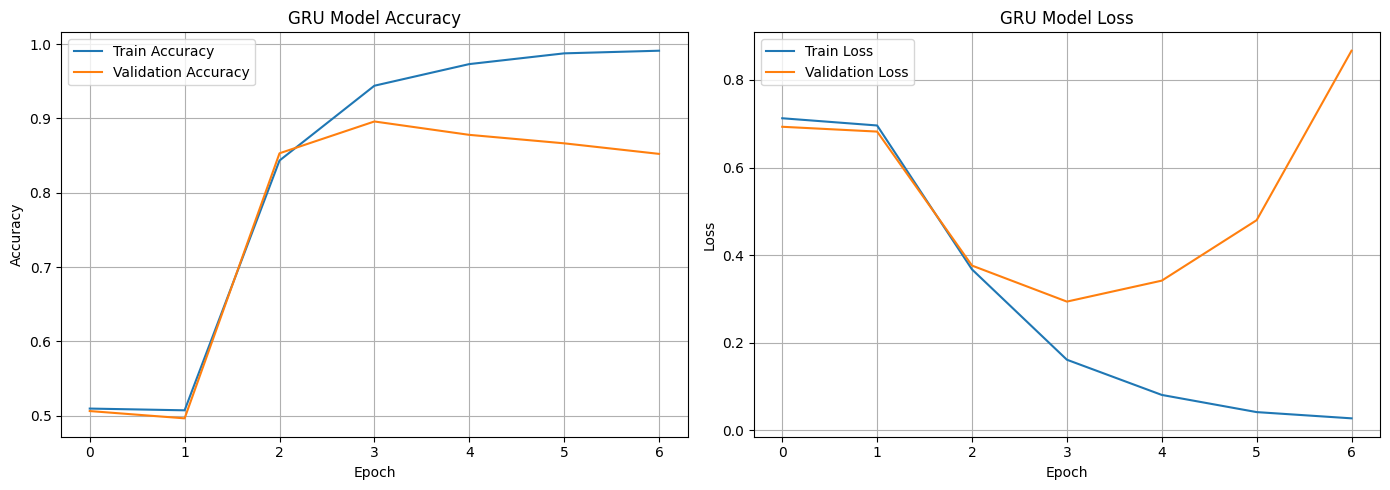

In [38]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step
              precision    recall  f1-score   support

           0     0.8886    0.8642    0.8763     12500
           1     0.8679    0.8917    0.8796     12500

    accuracy                         0.8780     25000
   macro avg     0.8782    0.8780    0.8779     25000
weighted avg     0.8782    0.8780    0.8779     25000



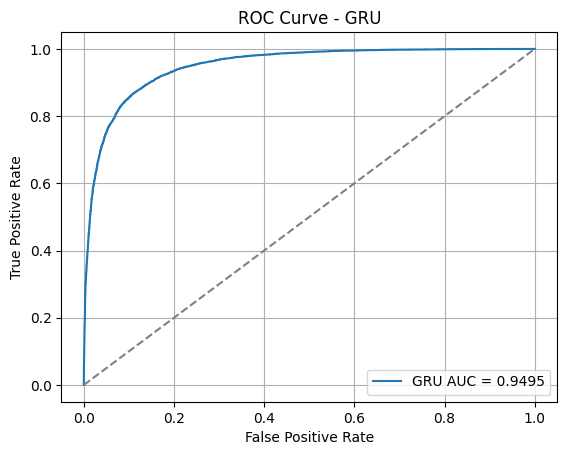

In [39]:
# Prediksi
y_pred_prob_gru = model_gru.predict(x_test)
y_pred_gru = (y_pred_prob_gru > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred_gru, digits=4))

# ROC & AUC
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_prob_gru)
auc_gru = roc_auc_score(y_test, y_pred_prob_gru)

# ROC Curve
plt.figure()
plt.plot(fpr_gru, tpr_gru, label=f"GRU AUC = {auc_gru:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GRU")
plt.legend()
plt.grid(True)
plt.show()

## Perbandingan Ke 3 Model

In [40]:
score_rnn = model.evaluate(x_test, y_test, verbose=0)
score_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
score_gru = model_gru.evaluate(x_test, y_test, verbose=0)

print("Akurasi Test SimpleRNN: {:.2f}%".format(score_rnn[1] * 100))
print("======================================================")
print("Akurasi Test LSTM: {:.2f}%".format(score_lstm[1] * 100))
print("======================================================")
print("Akurasi Test GRU: {:.2f}%".format(score_gru[1] * 100))

Akurasi Test SimpleRNN: 50.10%
Akurasi Test LSTM: 73.13%
Akurasi Test GRU: 87.80%


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def get_metrics(y_true, y_pred, y_prob):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_prob)
    }

# Hitung metrik
rnn_metrics = get_metrics(y_test, y_pred, y_pred_prob)
lstm_metrics = get_metrics(y_test, y_pred_lstm, y_pred_prob_lstm)
gru_metrics = get_metrics(y_test, y_pred_gru, y_pred_prob_gru)

# Gabungkan dalam DataFrame
import pandas as pd
comparison_df = pd.DataFrame({
    'SimpleRNN': rnn_metrics,
    'LSTM': lstm_metrics,
    'GRU': gru_metrics
}).T

# Tampilkan sebagai persentase
comparison_df = comparison_df.round(4) * 100
display(comparison_df)


,Precision,Recall,F1-score,AUC
SimpleRNN,52.36,2.13,4.09,49.27
LSTM,95.71,48.42,64.31,92.59
GRU,86.79,89.17,87.96,94.95


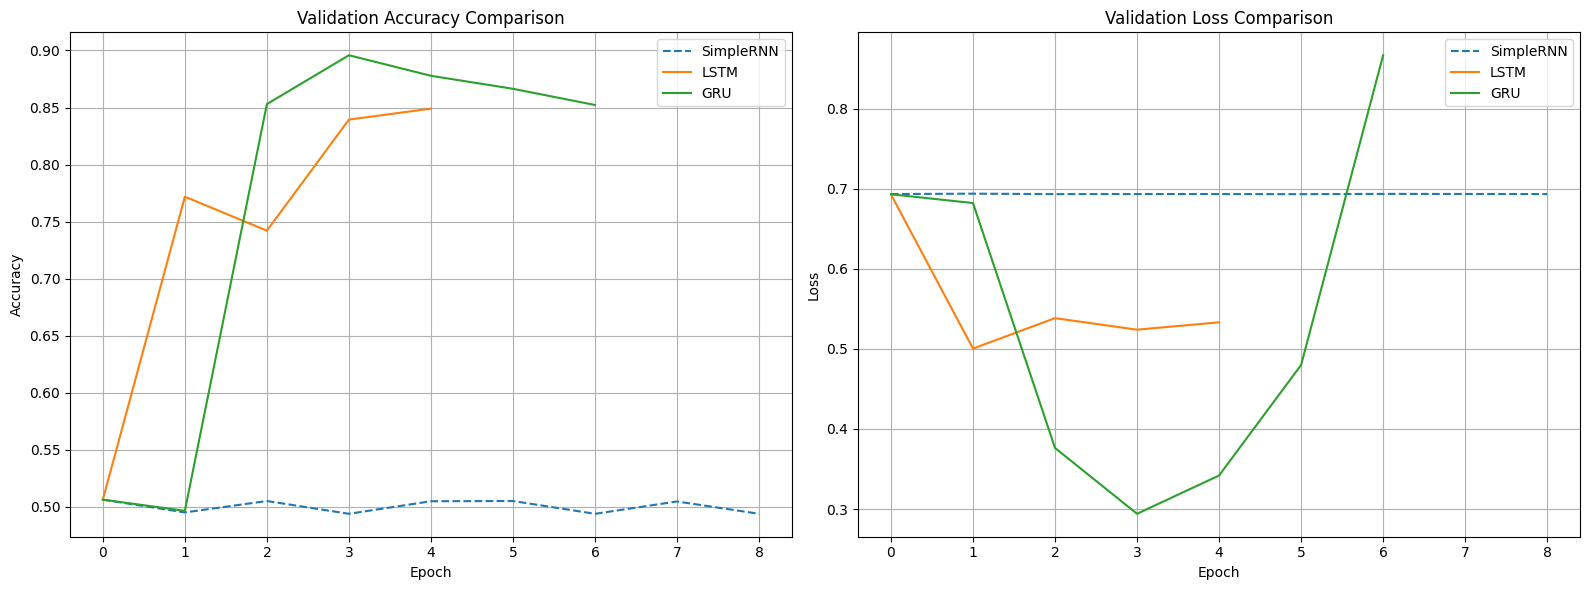

In [42]:
plt.figure(figsize=(16, 6))

# Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='SimpleRNN', linestyle='--')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_gru.history['val_accuracy'], label='GRU')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='SimpleRNN', linestyle='--')
plt.plot(history_lstm.history['val_loss'], label='LSTM')
plt.plot(history_gru.history['val_loss'], label='GRU')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Persamaan Matematis

Metrik Evaluasi

### Accuracy
$$
\text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{Total Samples}}
$$

### Precision
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

### Recall
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### F1-Score
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### AUC (Area Under Curve)
Mengukur area di bawah kurva ROC. Semakin besar, semakin baik model membedakan antara kelas.

---

## 📈 ROC Curve
ROC (Receiver Operating Characteristic) menunjukkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR):

- TPR = Recall
- FPR = \( \frac{FP}{FP + TN} \)

Kurva ROC ideal berada di pojok kiri atas (TPR tinggi, FPR rendah).